In [1]:
import pandas as pd
from ast import literal_eval
import seaborn as sns
from matplotlib.ticker import MaxNLocator
import matplotlib.pyplot as plt
import re
import unicodedata

pd.options.mode.chained_assignment = None

In [2]:
team_abbrevs = {
    'Anaheim Ducks':'ANA',
    'Arizona Coyotes':'ARI',
    'Boston Bruins':'BOS',
    'Buffalo Sabres':'BUF',
    'Calgary Flames':'CGY',
    'Carolina Hurricanes':'CAR',
    'Chicago Blackhawks':'CHI',
    'Colorado Avalanche':'COL',
    'Columbus Blue Jackets':'CBJ',
    'Dallas Stars':'DAL',
    'Detroit Red Wings':'DET',
    'Edmonton Oilers':'EDM',
    'Florida Panthers':'FLA',
    'Los Angeles Kings':'LAK',
    'Minnesota Wild':'MIN',
    'Montréal Canadiens':'MTL',
    'Nashville Predators':'NSH',
    'New Jersey Devils':'NJD',
    'New York Islanders':'NYI',
    'New York Rangers':'NYR',
    'Ottawa Senators':'OTT',
    'Philadelphia Flyers':'PHI',
    'Pittsburgh Penguins':'PIT',
    'San Jose Sharks':'SJS',
    'Seattle Kraken':'SEA',
    'St. Louis Blues':'STL',
    'Tampa Bay Lightning':'TBL',
    'Toronto Maple Leafs':'TOR',
    'Vancouver Canucks':'VAN',
    'Vegas Golden Knights':'VGK',
    'Washington Capitals':'WSH',
    'Winnipeg Jets':'WPG'
}

team_colors = {
    'Anaheim Ducks':['#F47A38', '#000', '#B9975B'],
    'Arizona Coyotes':['#8C2633', '#E2D6B5', '#FFFFFF'],
    'Boston Bruins':['#000000', '#FFB81C', '#FFFFFF'],
    'Buffalo Sabres':['#002654', '#FCB514', '#FFFFFF'],
    'Calgary Flames':['#c8102E', '#F1BE48', '#FFFFFF'],
    'Carolina Hurricanes':['#cc0000', '#000000', '#FFFFFF'],
    'Chicago Blackhawks':['#CF0A2C', '#000000', '#FF671B'],
    'Colorado Avalanche':['#6F263D', '#236192', '#FFFFFF'],
    'Columbus Blue Jackets':['#002654', '#ce1126', '#FFFFFF'],
    'Dallas Stars':['#006847', '#111111', '#FFFFFF'],
    'Detroit Red Wings':['#ce1126', '#FFFFFF', '#FFFFFF'],
    'Edmonton Oilers':['#041E42', '#FF4C00', '#FFFFFF'],
    'Florida Panthers':['#041E42', '#c8102E', '#FFFFFF'],
    'Los Angeles Kings':['#111111', '#A2AAAD', '#FFFFFF'],
    'Minnesota Wild':['#154734', '#A6192E', '#FFFFFF'],
    'Montréal Canadiens':['#AF1E2D', '#192168', '#FFFFFF'],
    'Nashville Predators':['#FFB81C', '#041E42', '#041E42'],
    'New Jersey Devils':['#CE1126', '#000000', '#FFFFFF'],
    'New York Islanders':['#00539b', '#f47d30', '#FFFFFF'],
    'New York Rangers':['#0038A8', '#CE1126', '#FFFFFF'],
    'Ottawa Senators':['#c52032', '#000000', '#FFFFFF'],
    'Philadelphia Flyers':['#F74902', '#000000', '#FFFFFF'],
    'Pittsburgh Penguins':['#000000', '#FCB514', '#FFFFFF'],
    'San Jose Sharks':['#006D75', '#000000', '#FFFFFF'],
    'St. Louis Blues':['#002F87', '#FCB514', '#FFFFFF'],
    'Seattle Kraken':['#001628', '#e9072b', '#99d9d9'],
    'Tampa Bay Lightning':['#002868', '#FFFFFF', '#FFFFFF'],
    'Toronto Maple Leafs':['#00205b', '#FFFFFF', '#FFFFFF'],
    'Vancouver Canucks':['#00205B', '#00843d', '#FFFFFF'],
    'Vegas Golden Knights':['#B4975A', '#333f42', '#FFFFFF'],
    'Washington Capitals':['#041E42', '#C8102E', '#FFFFFF'],
    'Winnipeg Jets':['#041E42', '#004C97', '#FFFFFF']
}

In [3]:
def remove_accent(text):
    """
    Remove accent from text
    :param text: text to remove accent from
    :return: text without accent
    """
    return unicodedata.normalize('NFKD', text).encode('ASCII', 'ignore').decode('utf-8', 'ignore')

In [4]:
def shorten_retained_amount(string):
    match = re.search(r'\$([\d,]+) retained', string)
    if match:
        amount = match.group(1)
        amount = amount.replace(',', '')
        amount = int(amount)
        suffixes = ['', 'k', 'm', 'b']
        suffix_index = 0
        
        while amount >= 1000 and suffix_index < len(suffixes) - 1:
            amount /= 1000
            suffix_index += 1
        if suffix_index > 1:  # Retained amount is in millions or higher
            formatted_amount = f"${amount:.1f}{suffixes[suffix_index]} retained"
        else:  # Retained amount is less than a million
            formatted_amount = f"${amount:.0f}{suffixes[suffix_index]} retained"
        string = re.sub(r'\$[\d,]+ retained', formatted_amount, string)
    return string

In [167]:
def format_player_str(series):
    """Format Player Column Strings"""
    series = series.str.replace(" round pick", "")
    series = series.str.replace('[RFA Rights]', "", regex=False)
    series = series.apply(shorten_retained_amount)
    series = series.apply(remove_accent)
    series = series.str.upper()
    series = series.str.strip()
    return series

In [5]:
df = pd.read_csv("trades.csv", encoding="latin-1", dtype={
    'post_id': str, 
    'post_name': str,
    'post_date': str,
    'team': str,
    'trade_id': int,
    'players_recieved': str,
'players_traded': str,
    'team_traded': str,
    'team_trade_with': str
})
df.head()

,post_id,post_name,post_date,team,trade_id,players_recieved,players_traded,team_traded,team_trade_with
0,728021,Intersting Marner trade from a Leafs fan - impact,"Jun. 20, 2023",2023-24 Carolina Hurricanes,1,"['Liljegren, Timothy', 'Marner, Mitchell']","['Necas, Martin', 'Pesce, Brett']",CAR,TOR
1,728021,Intersting Marner trade from a Leafs fan - impact,"Jun. 20, 2023",2023-24 Carolina Hurricanes,2,"['Konecny, Travis']","['Ponomarev, Vasili', '2023 1st round pick (CA...",CAR,PHI
2,727899,Leafs,"Jun. 20, 2023",2023-24 Toronto Maple Leafs,1,"['Gravel, Kevin']","['Murray, Matt', 'Timmins, Conor', '2023 1st r...",TOR,NSH
3,727987,slow burn,"Jun. 20, 2023",2023-24 Vancouver Canucks,1,"['Peeke, Andrew']","['Beauvillier, Anthony', '2023 3rd round pick ...",VAN,CBJ
4,727987,slow burn,"Jun. 20, 2023",2023-24 Vancouver Canucks,2,['2023 6th round pick (ARI)'],"['Myers, Tyler']",VAN,ARI


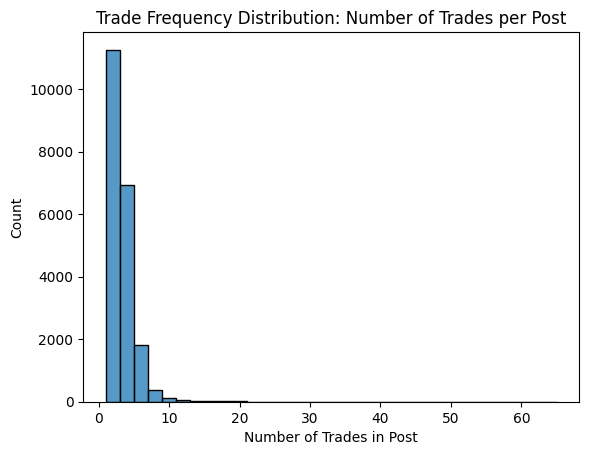

In [6]:
num_trades = df.groupby(by=['post_id'])['trade_id'].max().reset_index()
num_trades_hist = sns.histplot(num_trades['trade_id'], binwidth=2)
num_trades_hist.set(xlabel="Number of Trades in Post", title="Trade Frequency Distribution: Number of Trades per Post")
plt.show()

In [7]:
df['post_date'] = pd.to_datetime(df['post_date'])
# Take only the posts that are from after the regular season is over
df = df[df['post_date'] > '2023-04-13']
# Post that have less than 5 trades 
df = df[~df.isin(df[df['trade_id'] >= 5]['post_id'].unique())]

In [8]:
display(df['post_id'].nunique())
display(df['post_date'].nunique())

17296

68

In [33]:
players_traded_df = df[['team_traded', 'players_traded']].explode('players_traded').value_counts().reset_index()
players_traded_df['players_traded'] = format_player_str(players_traded_df['players_traded'])
players_traded_df.to_csv('players_traded.csv', index=False, header=['Team', 'Piece', 'Count'])

players_recieved_df = df[['team_traded', 'players_recieved']].explode('players_recieved').value_counts().reset_index()
players_recieved_df['players_recieved'] = format_player_str(players_traded_df['players_traded'])
players_recieved_df.to_csv('players_recieved.csv', index=False, header=['Team', 'Piece', 'Count'])



# Most Common Players Sent and Recieved for Each Team

In [10]:
df['players_recieved'] = df['players_recieved'].apply(literal_eval)
df['players_traded'] = df['players_traded'].apply(literal_eval)



In [34]:
def top_five_traded_away(team, picks=True):
    
    team_abbr = team_abbrevs[team]
    data = df['players_traded'].loc[df['team_traded'] == team_abbr].explode().value_counts()
    data = data.reset_index()

    ylabel = 'Players or Picks'
    if not picks:
        data = data.loc[~data['index'].str.contains("round pick"), :].copy()
        ylabel = "Players"

    top_5 = data.head(5)
    top_5['index'] = format_player_str(top_5['index'])

    plot = sns.barplot(
        data=top_5,
        x='players_traded', y='index',
        color=team_colors[team][0],
    )
    
    plot.set(xlabel="Times Traded Out", ylabel=ylabel, title=(team + " CapFriendly: Top 5 Traded Away"))
    plot.xaxis.set_major_locator(MaxNLocator(integer=True))
    plot.set_facecolor("#ADD8E6")

    
    plot.set_yticklabels(top_5['index'], ha='left', color=team_colors[team][1])
    plot.tick_params(axis='y', pad=-7, left=False)
    return plot

In [12]:
team_names = list(team_abbrevs.keys())
for team in team_names:
    plot = top_five_traded_away(team, True)
    plt.savefig(f"players_traded_away_with_picks/{team.replace(' ', '_')}.png")
    plt.close()

In [35]:
def top_five_recieved(team, picks=True):
    team_abbr = team_abbrevs[team]
    data = df['players_recieved'].loc[df['team_traded'] == team_abbr].explode().value_counts()
    data = data.reset_index()

    if not picks:
        data = data.loc[~data['index'].str.contains("round pick"), :].copy()

    top_5 = data.head(5)
    top_5['index'] = format_player_str(top_5['index'])

    plot = sns.barplot(
    data=top_5,
    x='players_recieved', y='index',
    color=team_colors[team][0]
    )
    plot.set(xlabel="Times Traded For", ylabel="Players or Picks", title=(team +" CapFriendly Armchair-GM Trades"))
    plot.xaxis.set_major_locator(MaxNLocator(integer=True))
    
    plot.set_yticklabels(top_5['index'], ha='left', color=team_colors[team][1])
    plot.tick_params(axis='y', pad=-10, left=False)
    return plot

In [14]:
for team in team_names:
    plot = top_five_recieved(team, True)
    plt.savefig(f"players_recieved_with_picks/{team.replace(' ', '_')}.png")
    plt.close()

# Most Common Trading Partners

In [15]:
count_df = df.groupby(['team_traded', 'team_trade_with']).size().reset_index(name='Count')
count_df.sort_values(by=['Count'], ascending=False)
count_df1 = count_df.copy()
combined = pd.merge(count_df, count_df1, left_on=['team_traded', 'team_trade_with'], right_on=['team_trade_with', 'team_traded'], )
combined['total'] = combined['Count_x'] + combined['Count_y']
combined.to_csv('common_trade_partners.csv')


In [16]:
def find_trade_partners(team):
    team_abbr = team_abbrevs[team]
    team_data = combined[combined['team_traded_x'] == team_abbr].sort_values(by=['total'], ascending=False)
    team_data = team_data.head(5)
    plot = sns.barplot(
    data=team_data,
    x='total', y='team_trade_with_x',
    color=team_colors[team][0]
    )
    plot.set(xlabel="Times Traded For", ylabel="Players or Picks", title=(team +" CapFriendly Armchair-GM Trades"))
    plot.xaxis.set_major_locator(MaxNLocator(integer=True))

    plot.set_yticklabels(team_data['team_trade_with_x'], ha='left', color=team_colors[team][1])
    plot.tick_params(axis='y', pad=-10, left=False)
    return plot



In [17]:
for team in team_names:
    plot = find_trade_partners(team)
    plt.savefig(f"trade_partners/{team.replace(' ', '_')}.png")
    plt.close()

# Time Line of Trade Activity

In [40]:
data = df[['players_traded', 'post_date']].explode('players_traded').value_counts().reset_index()
data['players_traded'] = format_player_str(data['players_traded'])
data.to_csv('player_traded_per_date.csv', header=['players_traded','post_date',	'count'], index=False)

data = df[['players_recieved', 'post_date']].explode('players_recieved').value_counts().reset_index()
data['players_recieved'] = format_player_str(data['players_recieved'])
data.to_csv('player_recieved_per_date.csv', header=['players_recieved','post_date',	'count'], index=False)

# Things most Commonly Packaged together

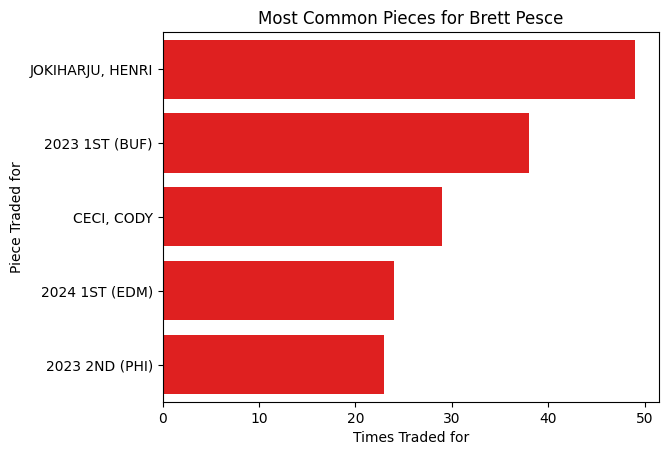

In [196]:
packaged = df[['team_traded', 'players_traded', 'players_recieved']].explode('players_traded').explode('players_recieved').value_counts().reset_index()
packaged['players_recieved'] = format_player_str(packaged['players_recieved'])
packaged['players_traded'] = format_player_str(packaged['players_traded'])
packaged_merged = pd.merge(packaged, packaged, left_on=['players_traded', 'players_recieved'], right_on=['players_recieved', 'players_traded'])
packaged_merged[['0_x','0_y']] = packaged_merged[['0_x','0_y']].fillna(value=0)
packaged_merged['total'] = packaged_merged['0_x'] + packaged_merged['0_y']
packaged_merged.to_csv("traded_for.csv", index=False)
packaged_merged = packaged_merged[(packaged_merged['players_traded_x'] == "PESCE, BRETT") & (packaged_merged['team_traded_y'] != 'TOR')].sort_values(by='total', ascending=False).head(5)
packaged_merged['desc'] = packaged_merged['players_recieved_x'] 
plot = sns.barplot(
    data=packaged_merged,
    x='total',
    y='desc',
    color='red'
)
plot.set_xlabel("Times Traded for")
plot.set_ylabel("Piece Traded for")
plot.set_title("Most Common Pieces for Brett Pesce")
plt.show()

# Most Common Pieces Traded for one another